In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
plt.ioff() 

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
import time

# Reflect Tables into SQLAlchemy ORM

In [50]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [51]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [52]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [53]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [54]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [55]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [56]:
Base.metadata.tables

immutabledict({'measurement': Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None), 'station': Table('station', MetaData(bind=None), Column('id', INTEGER(), table=<station>, primary_key=True, nullable=False), Column('station', TEXT(), table=<station>), Column('name', TEXT(), table=<station>), Column('latitude', FLOAT(), table=<station>), Column('longitude', FLOAT(), table=<station>), Column('elevation', FLOAT(), table=<station>), schema=None)})

# Exploratory Climate Analysis

In [57]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
first_row = session.query(Measurement).first()
first_row.__dict__

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x215e8663278>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [58]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x215e861a780>,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168}

In [59]:
# Calculate the date 1 year ago from the last data point in the database

from datetime import date
from sqlalchemy import and_
year = 2016
month = 8
day = 23
start_date = date(year, month, day)
end_date = date(start_date.year + 1, start_date.month, start_date.day)
df = pd.read_sql(session.query(Measurement).filter(
    and_(Measurement.date >= start_date, Measurement.date <= end_date)).statement, session.bind)

In [60]:
df.set_index('date', inplace=True)
df.head()

,id,station,prcp,tobs
date,,,,
2016-08-23,2364,USC00519397,0.00,81.0
2016-08-24,2365,USC00519397,0.08,79.0
2016-08-25,2366,USC00519397,0.08,80.0
2016-08-26,2367,USC00519397,0.00,79.0
2016-08-27,2368,USC00519397,0.00,77.0


In [15]:
sorted_df = df.sort_values(by=['date'])

In [61]:
df = pd.read_sql(session.query(Measurement.date, Measurement.prcp).statement, session.bind)

In [64]:
df.head()

,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


In [16]:
ndf= sorted_df.rename(columns={"prcp":"precipitation"})

In [17]:
ndf['precipitation']

date
2016-08-23    0.00
2016-08-23     NaN
2016-08-23    1.79
2016-08-23    0.05
2016-08-23    0.15
2016-08-23    0.70
2016-08-23    0.02
2016-08-24    0.08
2016-08-24    2.15
2016-08-24    2.28
2016-08-24     NaN
2016-08-24    1.45
2016-08-24    1.22
2016-08-24    2.15
2016-08-25    0.08
2016-08-25    0.00
2016-08-25    0.21
2016-08-25    0.06
2016-08-25    0.00
2016-08-25    0.11
2016-08-25    0.08
2016-08-26    0.03
2016-08-26    0.01
2016-08-26    0.00
2016-08-26    0.04
2016-08-26    0.02
2016-08-26    0.00
2016-08-27    0.18
2016-08-27    0.12
2016-08-27    0.00
              ... 
2017-08-16    0.42
2017-08-16    0.12
2017-08-16    0.07
2017-08-16    0.00
2017-08-17    0.13
2017-08-17    0.01
2017-08-17    0.00
2017-08-17    0.05
2017-08-18     NaN
2017-08-18    0.06
2017-08-18    0.00
2017-08-18    0.00
2017-08-19    0.00
2017-08-19    0.09
2017-08-19     NaN
2017-08-19    0.00
2017-08-20    0.00
2017-08-20    0.01
2017-08-20     NaN
2017-08-21    0.56
2017-08-21    0.02
2017-08

<IPython.core.display.Javascript object>


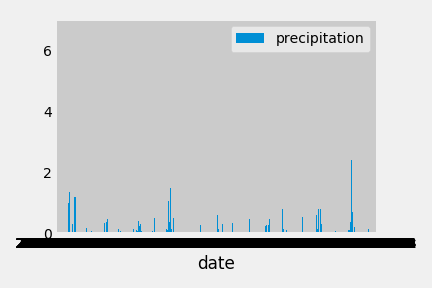

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
ax = ndf[['precipitation']].plot(kind='bar', rot=0)
ax.set_xlabel("date")
plt.show()
plt.tight_layout()
plt.gcf().canvas.draw()
time.sleep(0.2)
plt.close()

![precipitation](Images/precipitation.png)

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data

# get the quartile values for 25%, 50% and 75%
tiles = ndf.precipitation.quantile([0.25,0.5,0.75])

# 
d = {'precipitation': pd.Series([ndf['precipitation'].count(), ndf['precipitation'].mean(),
                                 ndf['precipitation'].std(), ndf['precipitation'].min(), tiles[0.25], tiles[0.50], tiles[0.75],
                                 ndf['precipitation'].max()], 
                                 index=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'])}

df = pd.DataFrame(d)
df.round(6)
df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [21]:
session.query(Station.station).order_by(Station.station).count()

9

In [89]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x215e873c470>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [103]:
from copy import deepcopy
lst = []
for r in rs:
    d = deepcopy(r.__dict__)
    del d["_sa_instance_state"]
    del d["id"]
    lst.append(d)
# print(rs[0].__dict__, rs[1].__dict__, rs[2].__dict__, rs[3].__dict__)
#   del d["_sa_instance_state"]
lst

[{'prcp': 0.08, 'station': 'USC00519397', 'tobs': 79.0, 'date': '2017-06-11'},
 {'prcp': 0.24, 'station': 'USC00513117', 'tobs': 73.0, 'date': '2017-06-11'},
 {'prcp': 0.14, 'station': 'USC00514830', 'tobs': 79.0, 'date': '2017-06-11'},
 {'prcp': 0.25, 'station': 'USC00519523', 'tobs': 81.0, 'date': '2017-06-11'},
 {'prcp': 0.74, 'station': 'USC00519281', 'tobs': 74.0, 'date': '2017-06-11'},
 {'prcp': 0.7, 'station': 'USC00516128', 'tobs': 76.0, 'date': '2017-06-11'}]

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
from sqlalchemy import func
q= session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

In [23]:
q

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
q = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                  filter(Measurement.station == "USC00519281").all()
q

[(54.0, 85.0, 71.66378066378067)]

In [25]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
df = pd.read_sql(session.query(Measurement).filter(
    and_(Measurement.date >= start_date, Measurement.date <= end_date)).\
    filter(Measurement.station == "USC00519281").statement, session.bind)

In [27]:
t = pd.DataFrame(df['tobs'])

<IPython.core.display.Javascript object>


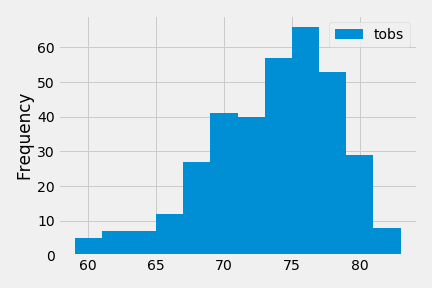

In [29]:
t.plot.hist(bins=12)
plt.tight_layout()
plt.show()
plt.gcf().canvas.draw()
time.sleep(0.2)
plt.close()

![precipitation](Images/station-histogram.png)

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-06-20', '2012-06-25'))

[(68.0, 73.45454545454545, 81.0)]


In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2016-08-20', '2016-08-25'))

[(72.0, 78.23076923076923, 81.0)]


In [32]:
list = calc_temps('2016-08-20', '2016-08-25')

<IPython.core.display.Javascript object>


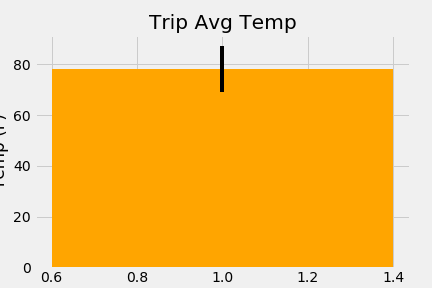

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
list = calc_temps('2016-08-20', '2016-08-25')
plt.clf()
plt.bar(1, list[0][1], color='orange', yerr=(list[0][2]-list[0][0]))
plt.ylabel("Temp (F)")
plt.title("Trip Avg Temp")
plt.show()

In [34]:
len(session.query(Measurement.station, Station.name,Station.latitude, Station.longitude, Station.elevation, ).all())
#len(session.query(Measurement.station).all())

175950

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
year = 2015
month = 8
day = 20
start_date = date(year, month, day)
end_date = date(start_date.year, start_date.month, start_date.day+5)
#rs = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, 
#                   Station.elevation, func.sum(Measurement.prcp)).filter(
#                   and_(Measurement.station == Station.station, Measurement.date >= start_date, Measurement.date <= end_date))
rs = session.query(Measurement.station, Station.name, Station.latitude, Station.longitude, 
                   Station.elevation, func.sum(Measurement.prcp)).filter(
                   and_(Measurement.station == Station.station, Measurement.date >= start_date, 
                        Measurement.date <= end_date)).group_by(Station.name).all()
  

In [36]:
rs

[('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  1.4000000000000001),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 1.86),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  4.45),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  5.7299999999999995),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  8.44),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.64),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  4.670000000000001)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
